# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port-cartier
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | kimberley
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | komsomolskiy
Processing Record 7 of Set 1 | soyo
Processing Record 8 of Set 1 | ko samui
Processing Record 9 of Set 1 | bani walid
Processing Record 10 of Set 1 | maunabo
Processing Record 11 of Set 1 | ruteng
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | ucluelet
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | launceston
Processing Record 19 of Set 1 | meyungs
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | tsihombe
C

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-cartier,50.0334,-66.8654,20.88,85,100,2.37,CA,1675824480
1,kimberley,-28.7323,24.7623,65.64,75,100,7.38,ZA,1675824611
2,klaksvik,62.2266,-6.5890,47.32,83,100,56.35,FO,1675824617
3,fortuna,40.5982,-124.1573,51.98,84,75,8.05,US,1675824619
4,komsomolskiy,40.4272,71.7189,30.92,80,99,4.61,UZ,1675824621


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-cartier,50.0334,-66.8654,20.88,85,100,2.37,CA,1675824480
1,kimberley,-28.7323,24.7623,65.64,75,100,7.38,ZA,1675824611
2,klaksvik,62.2266,-6.5890,47.32,83,100,56.35,FO,1675824617
3,fortuna,40.5982,-124.1573,51.98,84,75,8.05,US,1675824619
4,komsomolskiy,40.4272,71.7189,30.92,80,99,4.61,UZ,1675824621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

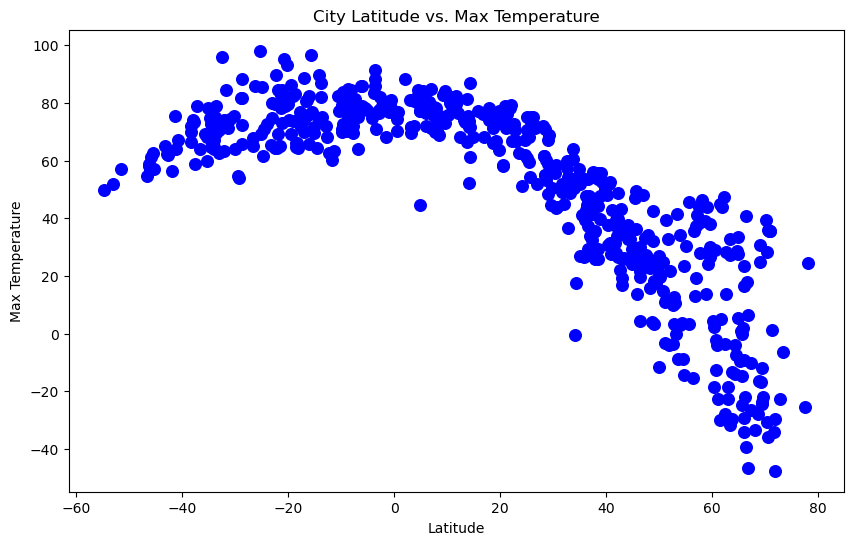

In [34]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue",  s=[70])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

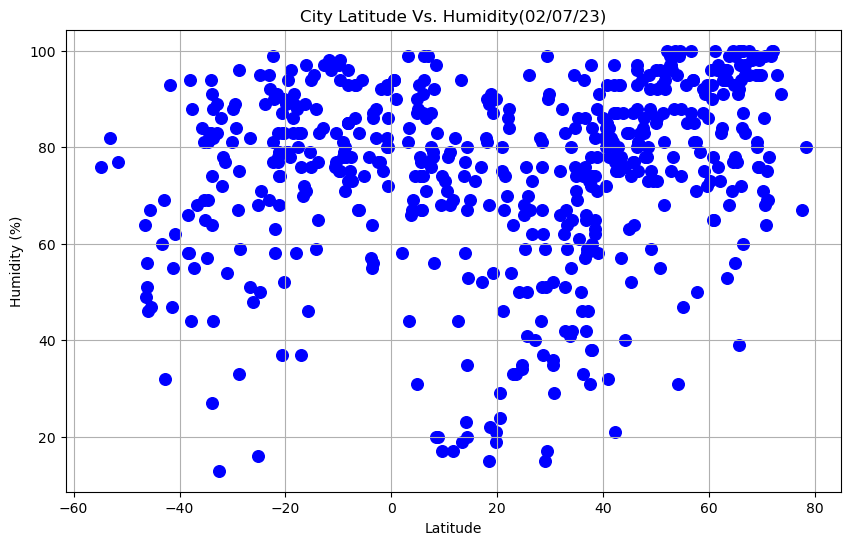

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue",  s=[70])

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude Vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

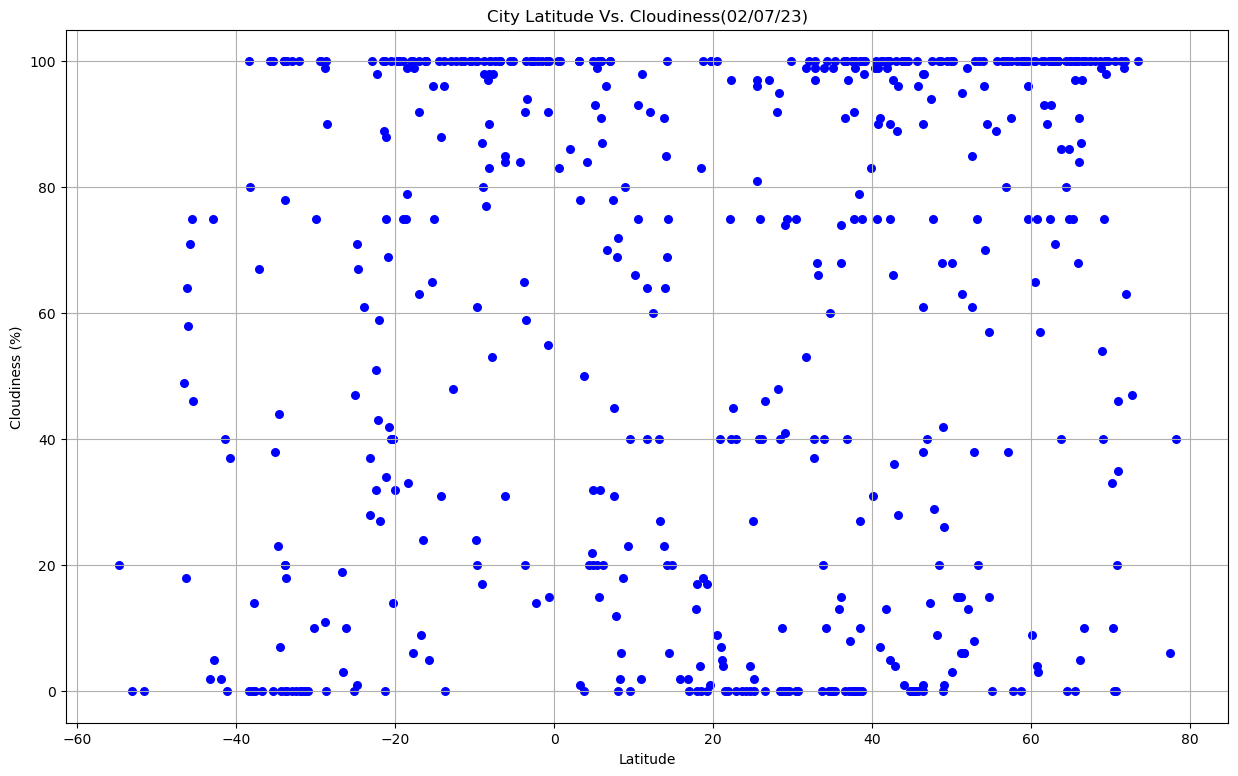

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(15,9))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue",  s=[30])

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude Vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

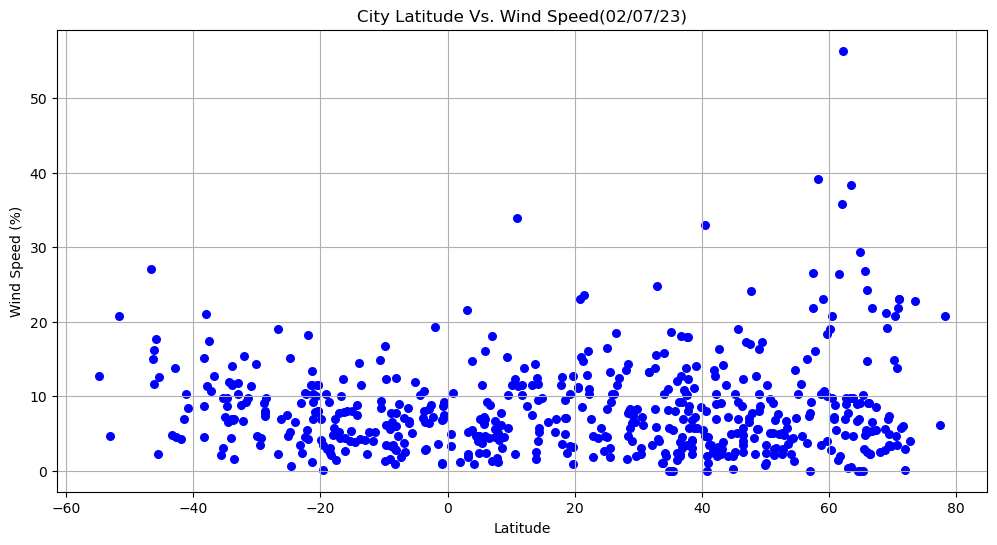

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(12,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue",  s=[30])

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude Vs. Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-25,50),fontsize=15,color="blue")
    plt.xlabel("Max Temp")
    plt.ylabel("Lat")
    plt.show()

       
    

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-cartier,50.0334,-66.8654,20.88,85,100,2.37,CA,1675824480
2,klaksvik,62.2266,-6.5890,47.32,83,100,56.35,FO,1675824617
3,fortuna,40.5982,-124.1573,51.98,84,75,8.05,US,1675824619
4,komsomolskiy,40.4272,71.7189,30.92,80,99,4.61,UZ,1675824621
6,ko samui,9.5357,99.9357,84.11,74,40,5.75,TH,1675824625


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kimberley,-28.7323,24.7623,65.64,75,100,7.38,ZA,1675824611
5,soyo,-6.1349,12.3689,78.89,83,84,6.44,AO,1675824622
9,ruteng,-8.6136,120.4721,71.29,78,77,3.51,ID,1675824628
10,ushuaia,-54.8000,-68.3000,49.66,76,20,12.66,AR,1675824636
11,port elizabeth,-33.9180,25.5701,67.32,91,20,6.91,ZA,1675824637


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8630299639542527


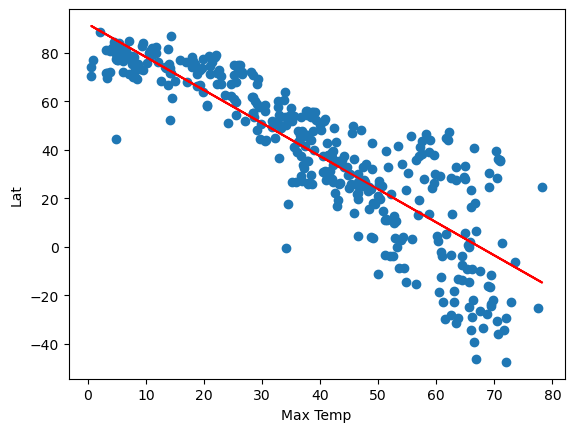

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values)

The r-squared is: 0.5006879198309242


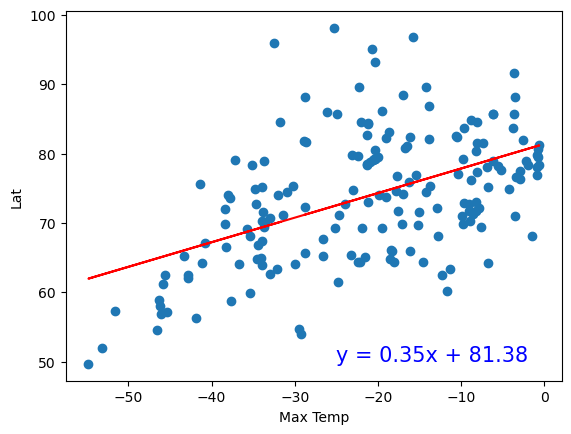

In [93]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, as latitude increases, the max temp decreases, showing a negative correlation.
In the southern hemisphere, as latitude increases, the max temp increases, showing a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.34542811526315076


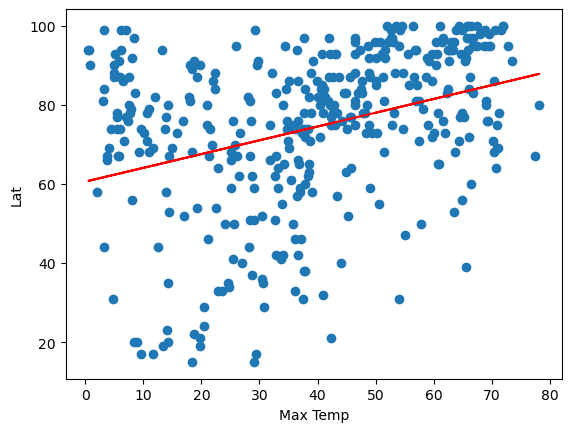

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values)

The r-squared is: 0.34291202190822734


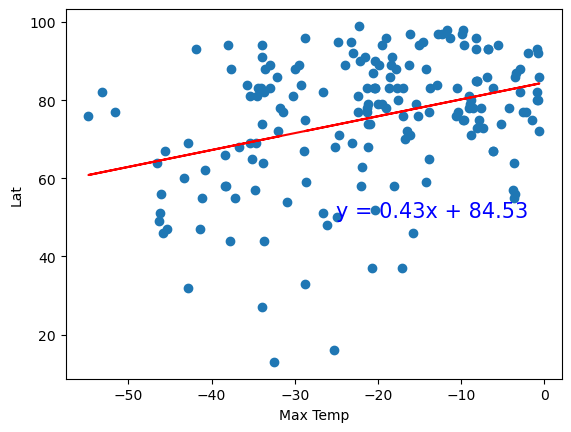

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, as latitude increases, the humidity increases, showing a positive correlation.
In the southern hemisphere, as latitude increases, the humidity increases, showing a positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.19791653637910048


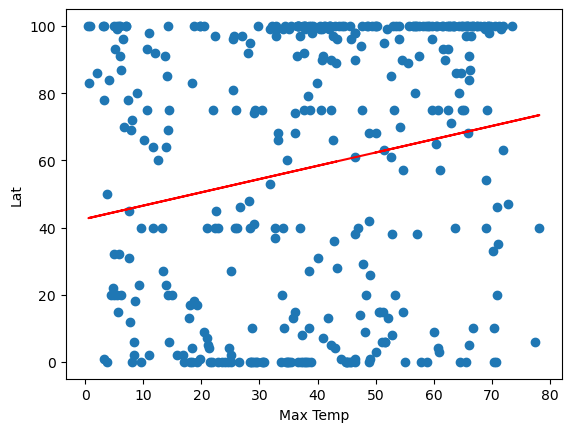

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values)

The r-squared is: 0.4647061436757993


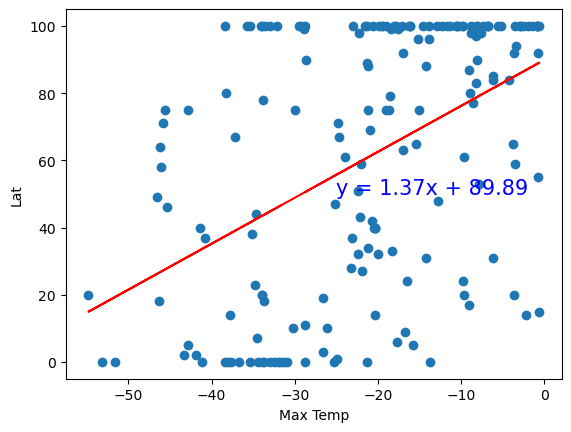

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, as latitude increases, cloudiness increases, showing a slight positive correlation.
In the southern hemisphere, as latitude increases, cloudiness increases, showing a stronger positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.123684157419115


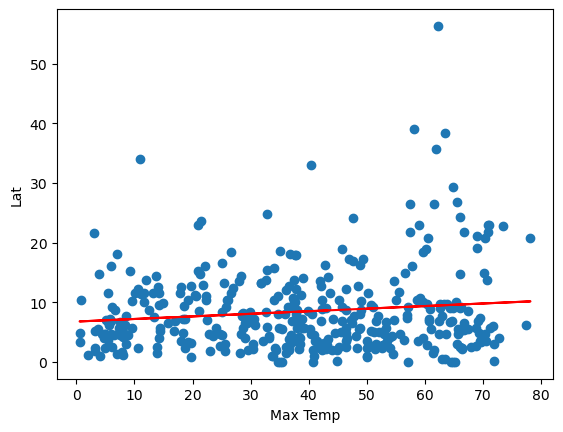

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-squared is: -0.33068204931828593


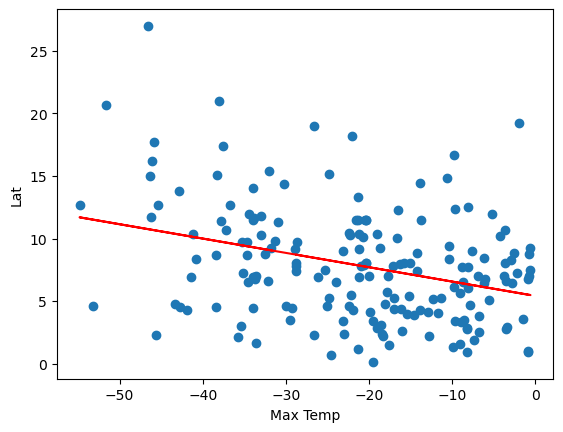

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, as latitude increases, wind speed slightly increases, showing a very slight positive correlation.
In the southern hemisphere, as latitude increases, wind speed decreases, showing a negative correlation.